In [1]:
import requests
import pandas as pd

In [2]:
## Get player stats by week     ##

PLAYER_STATS_API_KEY = '03d0150bd37d434d9339e14d1c849374'
player_week_api_endpoint = 'https://api.sportsdata.io/v3/nfl/stats/json/PlayerGameStatsByWeek/'

parameters = {
    'key': PLAYER_STATS_API_KEY,
}

season = '2022'
week='10'

response = requests.get(url=f"{player_week_api_endpoint}/{season}/{week}",params=parameters)
response.raise_for_status()
player_stats_week_10_data = response.json()

In [69]:
# Create dictionary of defense ranks:

defense_ranks = {
    'DEN': 1,
    'IND': 2,
    'NE': 3,
    'HOU': 4,
    'NYG': 5,
    'NYJ': 6,
    'SEA': 7,
    'PHI': 8,
    'CIN' : 9,
    'CHI': 10,
    'GB': 11,
    'ARI': 12,
    'LAC': 13,
    'BUF': 14,
    'MIA': 15,
    'TB': 16,
    'LV': 17,
    'NO': 18,
    'LAR': 19,
    'DAL': 20,
    'SF': 21,
    'CAR': 22,
    'CLE': 23,
    'DET': 24,
    'JAX': 25,
    'WAS': 26,
    'MIN': 27,
    'BAL': 28,
    'KC': 29,
    'TEN': 30,
    'ATL': 31,
    'PIT': 32,
}

In [3]:
##      Create dictionnary of players       ##

active_wide_receivers_week_10_stats = {}
for player in player_stats_week_10_data:
    if player['Position'] == 'WR' and player['Started'] == 1:
        active_wide_receivers_week_10_stats[player['Name']] = player

active_wide_receivers_week_10_stats

{'Christian Watson': {'GameKey': '202211012',
  'PlayerID': 23395,
  'SeasonType': 1,
  'Season': 2022,
  'GameDate': '2022-11-13T16:25:00',
  'Week': 10,
  'Team': 'GB',
  'Opponent': 'DAL',
  'HomeOrAway': 'HOME',
  'Number': 9,
  'Name': 'Christian Watson',
  'Position': 'WR',
  'PositionCategory': 'OFF',
  'Activated': 1,
  'Played': 1,
  'Started': 1,
  'PassingAttempts': 0.0,
  'PassingCompletions': 0.0,
  'PassingYards': 0.0,
  'PassingCompletionPercentage': 0.0,
  'PassingYardsPerAttempt': 0.0,
  'PassingYardsPerCompletion': 0.0,
  'PassingTouchdowns': 0.0,
  'PassingInterceptions': 0.0,
  'PassingRating': 0.0,
  'PassingLong': 0.0,
  'PassingSacks': 0.0,
  'PassingSackYards': 0.0,
  'RushingAttempts': 0.0,
  'RushingYards': 0.0,
  'RushingYardsPerAttempt': 0.0,
  'RushingTouchdowns': 0.0,
  'RushingLong': 0.0,
  'ReceivingTargets': 7.4,
  'Receptions': 3.7,
  'ReceivingYards': 103.0,
  'ReceivingYardsPerReception': 25.8,
  'ReceivingTouchdowns': 2.8,
  'ReceivingLong': 55.9,
 

In [4]:
##       CREATE initial dataframe with player names as index      #

df_week_10 = pd.DataFrame.from_dict(active_wide_receivers_week_10_stats, orient='index')

In [5]:
df_week_10['Percent_Off_Snaps_Played'] = df_week_10['OffensiveSnapsPlayed'] / df_week_10['OffensiveTeamSnaps']
# df_week_10.columns.values

In [6]:
df_week_10_useful_info = df_week_10[['OffensiveTouchdowns','Percent_Off_Snaps_Played','ReceivingYards','ReceivingTargets','ReceivingLong',
                            'ReceivingLong','FantasyPointsYahoo']]

df_week_10_useful_info



,OffensiveTouchdowns,Percent_Off_Snaps_Played,ReceivingYards,ReceivingTargets,ReceivingLong,ReceivingLong,FantasyPointsYahoo
Christian Watson,2.8,0.838710,103.0,7.4,55.9,55.9,29.6
CeeDee Lamb,1.9,0.900000,144.4,14.4,33.7,33.7,31.3
Justin Jefferson,0.9,1.000000,185.9,15.4,44.3,44.3,29.2
Nick Westbrook-Ikhine,1.9,0.766667,114.6,7.4,60.7,60.7,25.4
Christian Kirk,1.9,0.919355,101.1,11.6,23.1,23.1,26.0
...,...,...,...,...,...,...,...
Ashton Dulin,0.0,0.301587,0.0,0.0,0.0,0.0,0.0
Keelan Cole,0.0,0.686567,0.0,1.9,0.0,0.0,0.0
Michael Bandy,0.0,0.839286,0.0,0.9,0.0,0.0,0.0
Cam Sims,0.0,0.325000,0.0,0.9,0.0,0.0,0.0


In [7]:
## get week 9 stats.   ##

parameters = {
    'key': PLAYER_STATS_API_KEY,
}

season = '2022'
week='9'

response = requests.get(url=f"{player_week_api_endpoint}/{season}/{week}",params=parameters)
response.raise_for_status()
player_stats_week_9_data = response.json()

In [8]:
active_wide_receivers_week_9_stats = {}
for player in player_stats_week_9_data:
    if player['Position'] == 'WR' and player['Started'] == 1:
        active_wide_receivers_week_9_stats[player['Name']] = player

active_wide_receivers_week_9_stats

{'Davante Adams': {'GameKey': '202210915',
  'PlayerID': 16470,
  'SeasonType': 1,
  'Season': 2022,
  'GameDate': '2022-11-06T13:00:00',
  'Week': 9,
  'Team': 'LV',
  'Opponent': 'JAX',
  'HomeOrAway': 'AWAY',
  'Number': 17,
  'Name': 'Davante Adams',
  'Position': 'WR',
  'PositionCategory': 'OFF',
  'Activated': 1,
  'Played': 1,
  'Started': 1,
  'PassingAttempts': 0.0,
  'PassingCompletions': 0.0,
  'PassingYards': 0.0,
  'PassingCompletionPercentage': 0.0,
  'PassingYardsPerAttempt': 0.0,
  'PassingYardsPerCompletion': 0.0,
  'PassingTouchdowns': 0.0,
  'PassingInterceptions': 0.0,
  'PassingRating': 0.0,
  'PassingLong': 0.0,
  'PassingSacks': 0.0,
  'PassingSackYards': 0.0,
  'RushingAttempts': 0.0,
  'RushingYards': 0.0,
  'RushingYardsPerAttempt': 0.0,
  'RushingTouchdowns': 0.0,
  'RushingLong': 0.0,
  'ReceivingTargets': 29.1,
  'Receptions': 17.1,
  'ReceivingYards': 250.2,
  'ReceivingYardsPerReception': 25.0,
  'ReceivingTouchdowns': 5.9,
  'ReceivingLong': 65.1,
  'Fu

In [9]:
df_week_9 = pd.DataFrame.from_dict(active_wide_receivers_week_9_stats, orient='index')
df_week_9['Percent_Off_Snaps_Played'] = df_week_9['OffensiveSnapsPlayed'] / df_week_9['OffensiveTeamSnaps']


In [10]:
df_week_9_useful_info = df_week_9[['OffensiveTouchdowns','Percent_Off_Snaps_Played','ReceivingYards','ReceivingTargets','ReceivingLong',
                            'ReceivingLong','FantasyPointsYahoo']]

df_week_9_useful_info


,OffensiveTouchdowns,Percent_Off_Snaps_Played,ReceivingYards,ReceivingTargets,ReceivingLong,ReceivingLong,FantasyPointsYahoo
Davante Adams,5.9,0.950495,250.2,29.1,65.1,65.1,54.2
Tyreek Hill,2.9,0.785714,245.1,13.7,66.8,66.8,40.8
Cooper Kupp,2.9,1.000000,217.7,15.4,118.3,118.3,39.1
Justin Jefferson,2.9,1.000000,197.1,22.3,80.6,80.6,37.7
Allen Lazard,2.9,0.874016,149.1,17.1,80.6,80.6,28.6
...,...,...,...,...,...,...,...
Equanimeous St. Brown,0.0,0.700787,0.0,5.9,0.0,0.0,0.0
K.J. Osborn,0.0,0.805310,0.0,5.9,0.0,0.0,0.0
Van Jefferson,0.0,0.346939,0.0,14.7,0.0,0.0,0.0
Cody Hollister,0.0,0.494253,0.0,2.9,0.0,0.0,0.0


In [11]:
## get week 8 stats.   ##

parameters = {
    'key': PLAYER_STATS_API_KEY,
}

season = '2022'
week='8'

response = requests.get(url=f"{player_week_api_endpoint}/{season}/{week}",params=parameters)
response.raise_for_status()
player_stats_week_8_data = response.json()

In [12]:
active_wide_receivers_week_8_stats = {}
for player in player_stats_week_8_data:
    if player['Position'] == 'WR' and player['Started'] == 1:
        active_wide_receivers_week_8_stats[player['Name']] = player

active_wide_receivers_week_8_stats

{'A.J. Brown': {'GameKey': '202210826',
  'PlayerID': 21042,
  'SeasonType': 1,
  'Season': 2022,
  'GameDate': '2022-10-30T13:00:00',
  'Week': 8,
  'Team': 'PHI',
  'Opponent': 'PIT',
  'HomeOrAway': 'HOME',
  'Number': 11,
  'Name': 'A.J. Brown',
  'Position': 'WR',
  'PositionCategory': 'OFF',
  'Activated': 1,
  'Played': 1,
  'Started': 1,
  'PassingAttempts': 0.0,
  'PassingCompletions': 0.0,
  'PassingYards': 0.0,
  'PassingCompletionPercentage': 0.0,
  'PassingYardsPerAttempt': 0.0,
  'PassingYardsPerCompletion': 0.0,
  'PassingTouchdowns': 0.0,
  'PassingInterceptions': 0.0,
  'PassingRating': 0.0,
  'PassingLong': 0.0,
  'PassingSacks': 0.0,
  'PassingSackYards': 0.0,
  'RushingAttempts': 0.0,
  'RushingYards': 0.0,
  'RushingYardsPerAttempt': 0.0,
  'RushingTouchdowns': 0.0,
  'RushingLong': 0.0,
  'ReceivingTargets': 7.9,
  'Receptions': 4.3,
  'ReceivingYards': 132.4,
  'ReceivingYardsPerReception': 22.1,
  'ReceivingTouchdowns': 2.2,
  'ReceivingLong': 36.5,
  'Fumbles':

In [13]:
df_week_8 = pd.DataFrame.from_dict(active_wide_receivers_week_8_stats, orient='index')
df_week_8['Percent_Off_Snaps_Played'] = df_week_8['OffensiveSnapsPlayed'] / df_week_8['OffensiveTeamSnaps']


In [14]:
df_week_8_useful_info = df_week_8[['OffensiveTouchdowns','Percent_Off_Snaps_Played','ReceivingYards','ReceivingTargets','ReceivingLong',
                            'ReceivingLong','FantasyPointsYahoo']]

df_week_8_useful_info


,OffensiveTouchdowns,Percent_Off_Snaps_Played,ReceivingYards,ReceivingTargets,ReceivingLong,ReceivingLong,FantasyPointsYahoo
A.J. Brown,2.2,0.733333,132.4,7.9,36.5,36.5,31.1
Jaylen Waddle,1.4,0.758621,90.0,6.5,24.6,24.6,22.6
DeAndre Hopkins,0.7,1.000000,135.0,11.0,28.0,28.0,23.7
DJ Moore,0.7,0.955882,129.0,7.9,52.6,52.6,20.8
Tyreek Hill,0.0,0.724138,159.6,11.9,35.7,35.7,21.6
...,...,...,...,...,...,...,...
George Pickens,0.0,0.846154,0.0,2.2,0.0,0.0,0.0
Cody Hollister,0.0,0.551020,0.0,0.7,0.0,0.0,0.0
Nick Westbrook-Ikhine,0.0,0.755102,0.0,0.0,0.0,0.0,0.0
Van Jefferson,0.0,0.530612,0.0,0.0,0.0,0.0,0.0


In [15]:
## get week 7 stats.   ##

parameters = {
    'key': PLAYER_STATS_API_KEY,
}

season = '2022'
week='7'

response = requests.get(url=f"{player_week_api_endpoint}/{season}/{week}",params=parameters)
response.raise_for_status()
player_stats_week_7_data = response.json()


active_wide_receivers_week_7_stats = {}
for player in player_stats_week_7_data:
    if player['Position'] == 'WR' and player['Started'] == 1:
        active_wide_receivers_week_7_stats[player['Name']] = player

df_week_7 = pd.DataFrame.from_dict(active_wide_receivers_week_7_stats, orient='index')
df_week_7['Percent_Off_Snaps_Played'] = df_week_7['OffensiveSnapsPlayed'] / df_week_7['OffensiveTeamSnaps']


df_week_7_useful_info = df_week_7[['OffensiveTouchdowns','Percent_Off_Snaps_Played','ReceivingYards','ReceivingTargets','ReceivingLong',
                            'ReceivingLong','FantasyPointsYahoo']]


In [16]:
df_week_7_useful_info

,OffensiveTouchdowns,Percent_Off_Snaps_Played,ReceivingYards,ReceivingTargets,ReceivingLong,ReceivingLong,FantasyPointsYahoo
Ja'Marr Chase,5.3,0.927928,212.0,17.9,66.9,66.9,47.3
Mecole Hardman,8.0,0.625000,52.2,10.6,29.4,29.4,42.4
Tyler Boyd,2.7,0.747748,252.8,14.7,97.9,97.9,41.6
JuJu Smith-Schuster,2.7,0.548077,202.2,13.0,73.4,73.4,35.7
Mike Williams,2.7,0.758621,140.3,14.7,34.3,34.3,29.5
...,...,...,...,...,...,...,...
Dax Milne,0.0,0.347107,10.6,2.7,10.6,10.6,2.4
Romeo Doubs,0.0,0.886364,0.0,10.6,0.0,0.0,0.0
Marcus Johnson,0.0,0.785714,0.0,8.0,0.0,0.0,0.0
Nick Westbrook-Ikhine,0.0,0.760417,0.0,5.3,0.0,0.0,0.0


In [17]:
## get week 6 stats.   ##

parameters = {
    'key': PLAYER_STATS_API_KEY,
}

season = '2022'
week='6'

response = requests.get(url=f"{player_week_api_endpoint}/{season}/{week}",params=parameters)
response.raise_for_status()
player_stats_week_6_data = response.json()


active_wide_receivers_week_6_stats = {}
for player in player_stats_week_6_data:
    if player['Position'] == 'WR' and player['Started'] == 1:
        active_wide_receivers_week_6_stats[player['Name']] = player

df_week_6 = pd.DataFrame.from_dict(active_wide_receivers_week_6_stats, orient='index')
df_week_6['Percent_Off_Snaps_Played'] = df_week_6['OffensiveSnapsPlayed'] / df_week_6['OffensiveTeamSnaps']


df_week_6_useful_info = df_week_6[['OffensiveTouchdowns','Percent_Off_Snaps_Played','ReceivingYards','ReceivingTargets','ReceivingLong',
                            'ReceivingLong','FantasyPointsYahoo']]


In [18]:
## get week 5 stats.   ##

parameters = {
    'key': PLAYER_STATS_API_KEY,
}

season = '2022'
week='5'

response = requests.get(url=f"{player_week_api_endpoint}/{season}/{week}",params=parameters)
response.raise_for_status()
player_stats_week_5_data = response.json()


active_wide_receivers_week_5_stats = {}
for player in player_stats_week_5_data:
    if player['Position'] == 'WR' and player['Started'] == 1:
        active_wide_receivers_week_5_stats[player['Name']] = player

df_week_5 = pd.DataFrame.from_dict(active_wide_receivers_week_5_stats, orient='index')
df_week_5['Percent_Off_Snaps_Played'] = df_week_5['OffensiveSnapsPlayed'] / df_week_5['OffensiveTeamSnaps']


df_week_5_useful_info = df_week_5[['OffensiveTouchdowns','Percent_Off_Snaps_Played','ReceivingYards','ReceivingTargets','ReceivingLong',
                            'ReceivingLong','FantasyPointsYahoo']]


In [19]:
## get week 4 stats.   ##

parameters = {
    'key': PLAYER_STATS_API_KEY,
}

season = '2022'
week='4'

response = requests.get(url=f"{player_week_api_endpoint}/{season}/{week}",params=parameters)
response.raise_for_status()
player_stats_week_4_data = response.json()


active_wide_receivers_week_4_stats = {}
for player in player_stats_week_4_data:
    if player['Position'] == 'WR' and player['Started'] == 1:
        active_wide_receivers_week_4_stats[player['Name']] = player

df_week_4 = pd.DataFrame.from_dict(active_wide_receivers_week_4_stats, orient='index')
df_week_4['Percent_Off_Snaps_Played'] = df_week_4['OffensiveSnapsPlayed'] / df_week_4['OffensiveTeamSnaps']


df_week_4_useful_info = df_week_4[['OffensiveTouchdowns','Percent_Off_Snaps_Played','ReceivingYards','ReceivingTargets','ReceivingLong',
                            'ReceivingLong','FantasyPointsYahoo']]


In [20]:
## get week 3 stats.   ##

parameters = {
    'key': PLAYER_STATS_API_KEY,
}

season = '2022'
week='3'

response = requests.get(url=f"{player_week_api_endpoint}/{season}/{week}",params=parameters)
response.raise_for_status()
player_stats_week_3_data = response.json()


active_wide_receivers_week_3_stats = {}
for player in player_stats_week_3_data:
    if player['Position'] == 'WR' and player['Started'] == 1:
        active_wide_receivers_week_3_stats[player['Name']] = player

df_week_3 = pd.DataFrame.from_dict(active_wide_receivers_week_3_stats, orient='index')
df_week_3['Percent_Off_Snaps_Played'] = df_week_3['OffensiveSnapsPlayed'] / df_week_3['OffensiveTeamSnaps']


df_week_3_useful_info = df_week_3[['OffensiveTouchdowns','Percent_Off_Snaps_Played','ReceivingYards','ReceivingTargets','ReceivingLong',
                            'ReceivingLong','FantasyPointsYahoo']]


In [21]:
## get week 2 stats.   ##

parameters = {
    'key': PLAYER_STATS_API_KEY,
}

season = '2022'
week='2'

response = requests.get(url=f"{player_week_api_endpoint}/{season}/{week}",params=parameters)
response.raise_for_status()
player_stats_week_2_data = response.json()


active_wide_receivers_week_2_stats = {}
for player in player_stats_week_2_data:
    if player['Position'] == 'WR' and player['Started'] == 1:
        active_wide_receivers_week_2_stats[player['Name']] = player

df_week_2 = pd.DataFrame.from_dict(active_wide_receivers_week_2_stats, orient='index')
df_week_2['Percent_Off_Snaps_Played'] = df_week_2['OffensiveSnapsPlayed'] / df_week_2['OffensiveTeamSnaps']


df_week_2_useful_info = df_week_2[['OffensiveTouchdowns','Percent_Off_Snaps_Played','ReceivingYards','ReceivingTargets','ReceivingLong',
                            'ReceivingLong','FantasyPointsYahoo']]


In [22]:
## get week 1 stats.   ##

parameters = {
    'key': PLAYER_STATS_API_KEY,
}

season = '2022'
week='1'

response = requests.get(url=f"{player_week_api_endpoint}/{season}/{week}",params=parameters)
response.raise_for_status()
player_stats_week_1_data = response.json()


active_wide_receivers_week_1_stats = {}
for player in player_stats_week_1_data:
    if player['Position'] == 'WR' and player['Started'] == 1:
        active_wide_receivers_week_1_stats[player['Name']] = player

df_week_1 = pd.DataFrame.from_dict(active_wide_receivers_week_1_stats, orient='index')
df_week_1['Percent_Off_Snaps_Played'] = df_week_1['OffensiveSnapsPlayed'] / df_week_1['OffensiveTeamSnaps']


df_week_1_useful_info = df_week_1[['OffensiveTouchdowns','Percent_Off_Snaps_Played','ReceivingYards','ReceivingTargets','ReceivingLong',
                            'ReceivingLong','FantasyPointsYahoo']]


In [24]:
all_weeks_players = {
                '10': active_wide_receivers_week_10_stats,
               '9': active_wide_receivers_week_9_stats,
               '8': active_wide_receivers_week_8_stats,
               '7': active_wide_receivers_week_7_stats,
               '6': active_wide_receivers_week_6_stats,
               '5': active_wide_receivers_week_5_stats,
               '4': active_wide_receivers_week_4_stats,
               '3': active_wide_receivers_week_3_stats,
               '2': active_wide_receivers_week_2_stats,
               '1': active_wide_receivers_week_1_stats,
              }

In [99]:
final_headers_for_df = ['name','OffensiveTouchdowns_n_1', 'Percent_Off_Snaps_Played_n_1', 'ReceivingYards_n_1', 'ReceivingTargets_n_1','ReceivingLong_n_1', 'FantasyPointsYahoo_n_1','OffensiveTeamSnaps_n_1', 'OffensiveSnapsPlayed_n_1',
                       'OffensiveTouchdowns_n_2', 'Percent_Off_Snaps_Played_n_2', 'ReceivingYards_n_2', 'ReceivingTargets_n_2','ReceivingLong_n_2', 'FantasyPointsYahoo_n_2', 'OffensiveTeamSnaps_n_2', 'OffensiveSnapsPlayed_n_2',
                       'OffensiveTouchdowns_n_3', 'Percent_Off_Snaps_Played_n_3', 'ReceivingYards_n_3', 'ReceivingTargets_n_3','ReceivingLong_n_3', 'FantasyPointsYahoo_n_3', 'OffensiveTeamSnaps_n_3', 'OffensiveSnapsPlayed_n_3',
                       'WEEK_N_DEFENSE_RANK', 'WEEK_N_FANTASY_POINTS']




In [100]:
final_df = pd.DataFrame(columns=final_headers_for_df)
final_df.set_index('name')

,OffensiveTouchdowns_n_1,Percent_Off_Snaps_Played_n_1,ReceivingYards_n_1,ReceivingTargets_n_1,ReceivingLong_n_1,FantasyPointsYahoo_n_1,OffensiveTeamSnaps_n_1,OffensiveSnapsPlayed_n_1,OffensiveTouchdowns_n_2,Percent_Off_Snaps_Played_n_2,...,OffensiveTouchdowns_n_3,Percent_Off_Snaps_Played_n_3,ReceivingYards_n_3,ReceivingTargets_n_3,ReceivingLong_n_3,FantasyPointsYahoo_n_3,OffensiveTeamSnaps_n_3,OffensiveSnapsPlayed_n_3,WEEK_N_DEFENSE_RANK,WEEK_N_FANTASY_POINTS
name,,,,,,,,,,,,,,,,,,,,,


In [28]:
final_dict = {}
for key in active_wide_receivers_week_1_stats:
    final_dict[key] =  [active_wide_receivers_week_1_stats[key]]

for key in active_wide_receivers_week_2_stats:
    if key in final_dict:
        final_dict[key].append(active_wide_receivers_week_2_stats[key])
    else:
        final_dict[key] =  [active_wide_receivers_week_2_stats[key]]

for key in active_wide_receivers_week_3_stats:
    if key in final_dict:
        final_dict[key].append(active_wide_receivers_week_3_stats[key])
    else:
        final_dict[key] =  [active_wide_receivers_week_3_stats[key]]       
        
for key in active_wide_receivers_week_4_stats:
    if key in final_dict:
        final_dict[key].append(active_wide_receivers_week_4_stats[key])
    else:
        final_dict[key] =  [active_wide_receivers_week_4_stats[key]] 
        
for key in active_wide_receivers_week_5_stats:
    if key in final_dict:
        final_dict[key].append(active_wide_receivers_week_5_stats[key])
    else:
        final_dict[key] =  [active_wide_receivers_week_5_stats[key]] 
        
for key in active_wide_receivers_week_6_stats:
    if key in final_dict:
        final_dict[key].append(active_wide_receivers_week_6_stats[key])
    else:
        final_dict[key] =  [active_wide_receivers_week_6_stats[key]] 
        
for key in active_wide_receivers_week_7_stats:
    if key in final_dict:
        final_dict[key].append(active_wide_receivers_week_7_stats[key])
    else:
        final_dict[key] =  [active_wide_receivers_week_7_stats[key]] 
        
for key in active_wide_receivers_week_8_stats:
    if key in final_dict:
        final_dict[key].append(active_wide_receivers_week_8_stats[key])
    else:
        final_dict[key] =  [active_wide_receivers_week_8_stats[key]] 
        
for key in active_wide_receivers_week_9_stats:
    if key in final_dict:
        final_dict[key].append(active_wide_receivers_week_9_stats[key])
    else:
        final_dict[key] =  [active_wide_receivers_week_9_stats[key]] 
        
for key in active_wide_receivers_week_10_stats:
    if key in final_dict:
        final_dict[key].append(active_wide_receivers_week_10_stats[key])
    else:
        final_dict[key] =  [active_wide_receivers_week_10_stats[key]] 
        

In [101]:
for key in final_dict:
    if len(final_dict[key])>3:
        for i in range(3,len(final_dict[key])):
            new_row = {

                'name': key + '_week_' + str(final_dict[key][i]['Week']),

                #week n-1
                'OffensiveTouchdowns_n_1' : final_dict[key][i-1]['OffensiveTouchdowns'],
                'OffensiveTeamSnaps_n_1' : float(final_dict[key][i-1]['OffensiveTeamSnaps']),
                'OffensiveSnapsPlayed_n_1' : float(final_dict[key][i-1]['OffensiveSnapsPlayed']),
                'ReceivingYards_n_1' : final_dict[key][i-1]['ReceivingYards'],
                'ReceivingTargets_n_1' : final_dict[key][i-1]['ReceivingTargets'],
                'ReceivingLong_n_1' : final_dict[key][i-1]['ReceivingLong'],
                'FantasyPointsYahoo_n_1' : final_dict[key][i-1]['FantasyPointsYahoo'],

                #week n-2
                'OffensiveTouchdowns_n_2' : final_dict[key][i-2]['OffensiveTouchdowns'],
                'OffensiveTeamSnaps_n_2' : float(final_dict[key][i-2]['OffensiveTeamSnaps']),
                'OffensiveSnapsPlayed_n_2' : float(final_dict[key][i-2]['OffensiveSnapsPlayed']),
                'ReceivingYards_n_2' : final_dict[key][i-2]['ReceivingYards'],
                'ReceivingTargets_n_2' : final_dict[key][i-2]['ReceivingTargets'],
                'ReceivingLong_n_2' : final_dict[key][i-2]['ReceivingLong'],
                'FantasyPointsYahoo_n_2' : final_dict[key][i-2]['FantasyPointsYahoo'],

                #week n-3
                'OffensiveTouchdowns_n_3' : final_dict[key][i-3]['OffensiveTouchdowns'],
                'OffensiveTeamSnaps_n_3' : float(final_dict[key][i-3]['OffensiveTeamSnaps']),
                'OffensiveSnapsPlayed_n_3' : float(final_dict[key][i-3]['OffensiveSnapsPlayed']),
                'ReceivingYards_n_3' : final_dict[key][i-3]['ReceivingYards'],
                'ReceivingTargets_n_3' : final_dict[key][i-3]['ReceivingTargets'],
                'ReceivingLong_n_3' : final_dict[key][i-3]['ReceivingLong'],
                'FantasyPointsYahoo_n_3' : final_dict[key][i-3]['FantasyPointsYahoo'],

                # week n
                'WEEK_N_DEFENSE_RANK': float(defense_ranks[final_dict[key][i]['Opponent']]),
                'WEEK_N_FANTASY_POINTS': final_dict[key][i]['FantasyPointsYahoo'],
            }
            final_df = final_df.append(new_row, ignore_index=True)
        
        

In [102]:
final_df['Percent_Off_Snaps_Played_n_1'] = final_df['OffensiveSnapsPlayed_n_1'] / final_df['OffensiveTeamSnaps_n_1']
final_df['Percent_Off_Snaps_Played_n_2'] = final_df['OffensiveSnapsPlayed_n_2'] / final_df['OffensiveTeamSnaps_n_2']
final_df['Percent_Off_Snaps_Played_n_3'] = final_df['OffensiveSnapsPlayed_n_3'] / final_df['OffensiveTeamSnaps_n_3']

In [103]:
final_df = final_df.drop(['OffensiveSnapsPlayed_n_1','OffensiveSnapsPlayed_n_2','OffensiveSnapsPlayed_n_3','OffensiveTeamSnaps_n_1','OffensiveTeamSnaps_n_2','OffensiveTeamSnaps_n_3'],axis=1)

In [105]:
# MACHINE LEARNING NOW

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
X = final_df.drop(['WEEK_N_FANTASY_POINTS','name'],axis=1)
y = final_df['WEEK_N_FANTASY_POINTS']

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
# Split data into training/test sets

# 70% of data is training data, set aside other 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [109]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [110]:
from sklearn.linear_model import LassoCV

In [111]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [112]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [113]:
lasso_cv_model.alpha_

0.2306291716770143

In [114]:
test_predictions = lasso_cv_model.predict(X_test)

In [115]:
#test error

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [116]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [117]:
MAE

7.170783478780222

In [118]:
RMSE

8.958732484756847

<AxesSubplot:ylabel='WEEK_N_FANTASY_POINTS'>

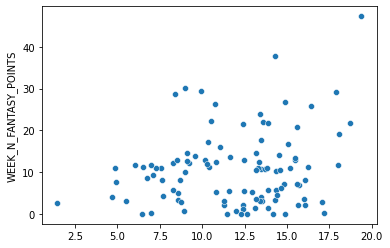

In [119]:
sns.scatterplot(x=test_predictions,y=y_test)

In [120]:
lasso_cv_model.coef_

array([-0.        ,  0.29339511,  0.7210099 , -1.56624053, -0.67167068,
        1.11876338,  0.        ,  0.959427  ,  2.40874423, -0.61551547,
       -2.03709961, -1.69788943, -0.50873269, -0.        ,  1.26175279,
        0.        ,  0.65344531,  0.        ,  2.15750737])

In [121]:
# final_df.corrwith(final_df['WEEK_N_FANTASY_POINTS']).sort_values()

In [122]:
## DONE ABOVE

In [124]:
# function to test new player for next week (week 11):
def get_data(name,opp):
    if name in final_dict:
        if len(final_dict[name])>2:
                player_info = [[
                    final_dict[name][-1]['OffensiveTouchdowns'],
                    (final_dict[name][-1]['OffensiveSnapsPlayed'] / final_dict[name][-1]['OffensiveTeamSnaps']),
                    final_dict[name][-1]['ReceivingYards'],
                    final_dict[name][-1]['ReceivingTargets'],
                    final_dict[name][-1]['ReceivingLong'],
                    final_dict[name][-1]['FantasyPointsYahoo'],
                    final_dict[name][-2]['OffensiveTouchdowns'],
                    (final_dict[name][-2]['OffensiveSnapsPlayed'] / final_dict[name][-2]['OffensiveTeamSnaps']),
                    final_dict[name][-2]['ReceivingYards'],
                    final_dict[name][-2]['ReceivingTargets'],
                    final_dict[name][-2]['ReceivingLong'],
                    final_dict[name][-2]['FantasyPointsYahoo'],
                    final_dict[name][-3]['OffensiveTouchdowns'],
                    (final_dict[name][-3]['OffensiveSnapsPlayed'] / final_dict[name][-3]['OffensiveTeamSnaps']),
                    final_dict[name][-3]['ReceivingYards'],
                    final_dict[name][-3]['ReceivingTargets'],
                    final_dict[name][-3]['ReceivingLong'],
                    final_dict[name][-3]['FantasyPointsYahoo'],
                    defense_ranks[opp]]]
                return player_info
            
        return(None)
    print("Can't make prediction, player hasn't played 3 games this season.")
    return(None)

In [125]:
#testing the model
user_player = get_data('Justin Jefferson','DAL')
user_player = scaler.transform(user_player)
print(user_player)

[[ 0.34314178  1.12301304  1.88175212  0.94720555  0.71460731  1.63095451
   2.57489256  1.12644734  2.62880222  2.43378339  2.87378852  2.87895977
  -0.58958507  1.02636995  0.1598116  -0.62295018 -0.251013   -0.23649711
   0.39730253]]


In [126]:
lasso_cv_model.predict(user_player)

array([9.78193489])

In [128]:
lasso_cv_model.coef_

array([-0.        ,  0.29339511,  0.7210099 , -1.56624053, -0.67167068,
        1.11876338,  0.        ,  0.959427  ,  2.40874423, -0.61551547,
       -2.03709961, -1.69788943, -0.50873269, -0.        ,  1.26175279,
        0.        ,  0.65344531,  0.        ,  2.15750737])

In [129]:
#final fit
X = scaler.transform(X)

lasso_cv_model.fit(X,y)

LassoCV(cv=5, eps=0.1)

In [130]:
lasso_cv_model.alpha_

0.1720743060569496

In [131]:
final_model = lasso_cv_model

In [132]:
final_model.predict(user_player)

array([10.85466602])

In [133]:
# saving model
from joblib import dump, load

In [136]:
dump(final_model, 'fantasy_week_12_model.joblib') 

['fantasy_week_12_model.joblib']

In [149]:
# USING MODEL WITH USER INPUT
loaded_model = load('fantasy_week_12_model.joblib')
user_input = input('Name a WR for their Week 12 Fantasy Prediction: ')
opp = input("Who are they playing this week? Team Code. Ex: Dallas = DAL. : ")
if user_input in final_dict:
    user_player = get_data(user_input,opp)
    if user_player == None: 
        print("Sorry, this player hasn't played 3 games this year. Can't make prediction.")
        pass
    else:
        user_player = scaler.transform(user_player)
        user_player_prediction = round(loaded_model.predict(user_player)[0],1)
        print(f"{user_input}'s Week 12 Projection is {user_player_prediction} PPR points.")
else:
    print("Cannot find that player, he either hasn't started a game this season or you mispelled his name.")

Name a WR for their Week 12 Fantasy Prediction: Davante Adams
Who are they playing this week? Team Code. Ex: Dallas = DAL. : DEN
Davante Adams's Week 12 Projection is 3.6 PPR points.
